In [6]:
using Plots
using Interact
using Optim

In [7]:
# 1) Strongly convex function: f(x) = (x^2)/2
f1(x) = (x^2) / 2
df1(x) = x

# 2) Non-smooth function: f(x) = |x|
f2(x) = abs(x)
df2(x) = sign(x)

# 3) Convex but not strongly convex function: f(x) = x^2
f3(x) = 1e-2*exp(x)
df3(x) = 1e-2*exp(x)

# 4) Nonconvex function: f(x) = -x^2
f4(x) = 5*sin(x) + x^2
df4(x) = 5*cos(x) + 2*x

range = -10:0.1:10

-10.0:0.1:10.0

In [8]:
# compute the fenchel conjugate at y: sup_x y'x - f(x)
function fenchel_argmax(f, y, M=10)
    fdiff(x) = f(x) - y * x
    return optimize(fdiff, -M, M).minimizer
end

function fenchel(f, y, M=10)
    x = fenchel_argmax(f, y, M)
    if abs(abs(x) - M) < 1e-3
        return Inf
    else
        return y * x - f(x)
    end
end

fenchel (generic function with 2 methods)

In [9]:
fenchel(f2, 3)

Inf

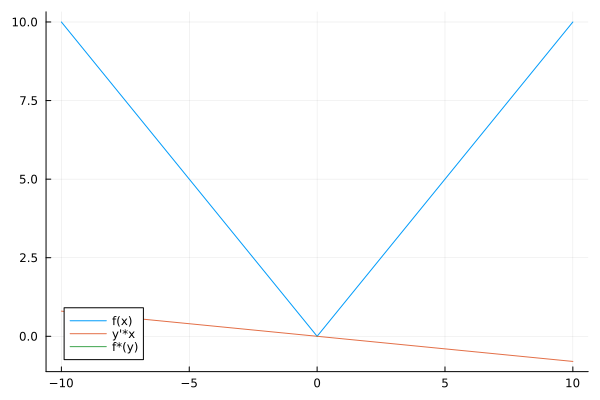

In [20]:
# plot the fenchel conjugate of myfunc at y
myfunc = f2
# @manipulate for y in slider(-10:0.1:10, label="y")
y = -.08

xs = -10:0.1:10
plot(xs, myfunc.(xs), label="f(x)")
# plot the line y'*x 
plot!(xs, [y * x for x in xs], label="y'*x")
xmax = fenchel_argmax(myfunc, y)
# plot the line segment from (xmax, y*x) to (xmax, f(xmax)
plot!([xmax, xmax], [y * xmax, myfunc(xmax)], label="f*(y)")

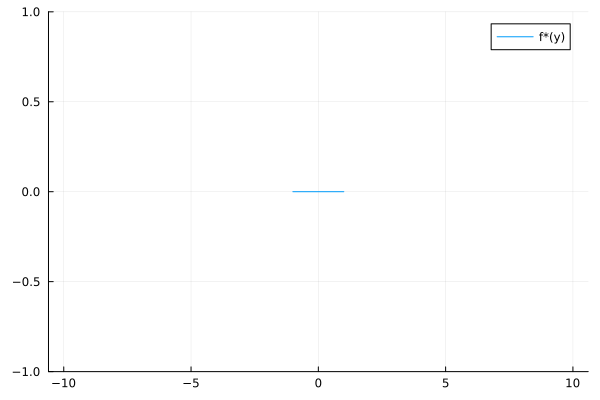

In [22]:
# compute and plot the fenchel conjugate of myfunc
ys = -10:0.1:10
fstars = [fenchel(myfunc, y) for y in ys]
plot(ys, fstars, label="f*(y)")
# set y axis to go from -1 to 1 
# ylims!(-1, 1)